In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
import statsmodels.api as sm

In [4]:
DataML = pd.read_csv('/Users/Vishnu/Desktop/ThesisData/Final_Data.csv')

In [7]:
DataML1 =DataML[['Electrification','Internet users (per 100 people)','Personal computers (per 100 people)','Net enrolment rate, primary, both sexes (%)']].copy()

In [8]:
DataML1 = DataML1[20:]


In [9]:
DataML1.columns = ['Electrification','Internet','PC','Enrollement']

In [10]:
DataML1 = DataML1.reset_index()
DataML1 = DataML1.drop(['index'],axis =1)

In [11]:
DataML1.to_csv('/Users/Vishnu/Desktop/ThesisData/ML_Data.csv')

# Machine Learning 


In [12]:
reg = linear_model.LinearRegression()

In [13]:
x = DataML1[['Electrification']]
y = DataML1[['Enrollement']]


In [14]:
reg.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Text(0,0.5,'Enrollement into Primary Schools (%)')

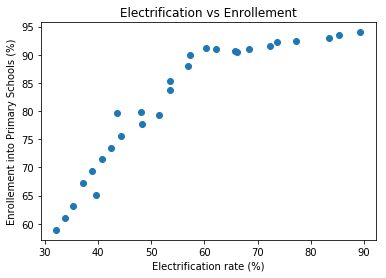

In [16]:
plt.scatter(DataML1['Electrification'], DataML1['Enrollement'])
plt.title('Electrification vs Enrollement')
plt.xlabel('Electrification rate (%)')
plt.ylabel('Enrollement into Primary Schools (%)')

Intercept:  [46.82976678]
Coefficients:  [[0.62058646]]
R-Squared value:  0.8223826514699312


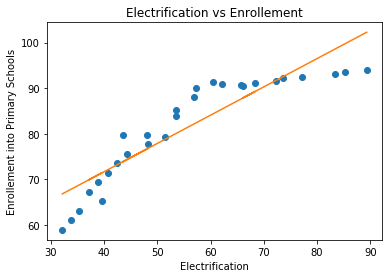

In [67]:
print('Intercept: ', reg.intercept_)
print('Coefficients: ', reg.coef_)
print('R-Squared value: ', R2)
model = sm.OLS(y,x).fit()

line = reg.coef_*x+reg.intercept_
plt.plot(x,y,'o', x, line)
plt.title('Electrification vs Enrollement')
plt.xlabel('Electrification')
plt.ylabel('Enrollement into Primary Schools')
plt.show()
r = DataML1[['Electrification','Enrollement']]


# R -squared

In [137]:
DataML1

,Electrification,Internet,PC,Enrollement
0,32.181431,0.000000,0.031074,58.902534
1,33.760102,0.000010,0.039488,60.989731
2,35.338774,0.000111,0.045367,63.076927
3,39.582534,0.000218,0.060796,65.164124
4,37.141731,0.001070,0.085247,67.251320
5,38.905041,0.026229,0.125549,69.338516
6,40.739313,0.046334,0.154139,71.425713
7,42.535294,0.070768,0.201926,73.512909
8,44.407323,0.139027,0.267925,75.600105
9,48.262991,0.273224,0.321947,77.687302


In [64]:
r = DataML1[['Electrification','Enrollement']]
mean = np.mean(r['Enrollement'])



In [65]:
r['mean']= mean


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [66]:
r['y-mean'] = (r['Enrollement'] - r['mean'])**2

expe = []
l = list(r['Electrification'])
for i in l:
    
    k = 0.62 * i + 46.82
    expe.append(k)
    
r['expe'] = np.array(expe)

r['y-exp'] = (r['expe'] - r['mean'])**2
expsum = np.sum(r['y-exp'])
meansum = np.sum(r['y-mean'])

R2 = expsum/meansum
R2

0.8223826514699312

# Non-Linear Regression

In [138]:
DataML2 = DataML1[['Electrification','Enrollement']]

In [139]:
DataML2['E^2'] = DataML2['Electrification'] **2

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [180]:
DtML2 = pd.read_csv('/Users/Vishnu/Desktop/ThesisData/DataML3.csv')

In [181]:
i = DtML2[['Electrification','E^2']]
d = DtML2[['Enrollement']]

In [182]:
reg3 = linear_model.LinearRegression()
reg3.fit(i,d)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [183]:
print(f"{reg3.intercept_[0]}+{reg3.coef_[0][0]}x1{reg3.coef_[0][1]}x2")

1.7482508379681292+2.25283331445974x1-0.013568275435015991x2


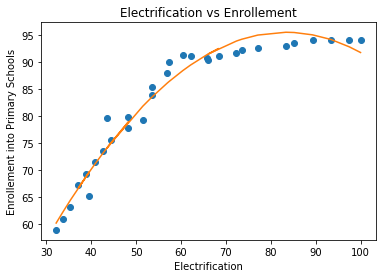

In [184]:
a = DtML2['Electrification']
b = DtML2['Enrollement']
line = 2.25*i['Electrification']-0.0135*i['E^2']+1.748
plt.plot(a,b,'o',a, line)
plt.title('Electrification vs Enrollement')
plt.xlabel('Electrification')
plt.ylabel('Enrollement into Primary Schools')
plt.show()

,Electrification
0,32.181431
1,33.760102
2,35.338774
3,39.582534
4,37.141731
5,38.905041
6,40.739313
7,42.535294
8,44.407323
9,48.262991
